# Group Number 2 - Members

* Ali Annan 202475973
* Kinan Morad 202471895
* Sasha Nasser 202473486
* Romanos Rizk 202471561
* Rita Salloum 202371596


# Importing the Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gc
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import ast
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("C:/Users/Usr/Desktop/AUB Masters/MSBA 315/Final Project/Final_dataset.csv")

# Exploratory Data Analysis

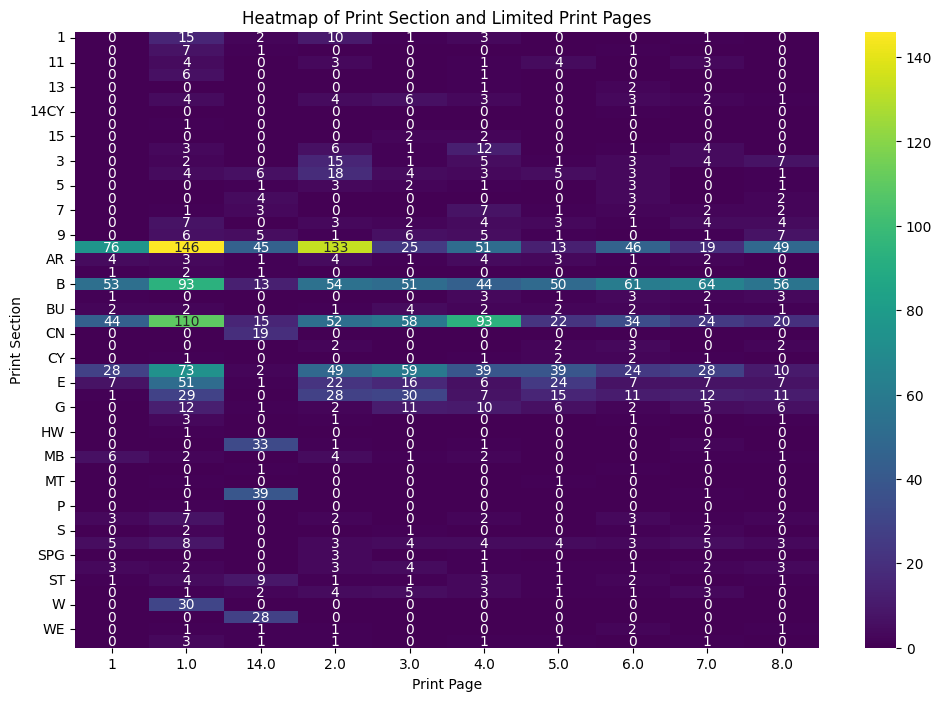

In [3]:
# Filter out rows with missing values and limit print pages
filtered_data = data.dropna(subset=['print_section', 'print_page'])
common_pages = filtered_data['print_page'].value_counts().nlargest(10).index
limited_data = filtered_data[filtered_data['print_page'].isin(common_pages)]

# Group and pivot the data
grouped_data = limited_data.groupby(['print_section', 'print_page']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='print_section', columns='print_page', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Print Section and Limited Print Pages')
plt.xlabel('Print Page')
plt.ylabel('Print Section')
plt.show()

document_type
article                                                                                                                                                                                                                 9380
multimedia                                                                                                                                                                                                               596
audio                                                                                                                                                                                                                     16
audiocontainer                                                                                                                                                                                                             6
{'original': 'By Ken Belson', 'person': [{'firstname': 'Ken', 'middlename': None, 'lastname': 'Belson'

C:\Users\Usr\AppData\Local\Temp\ipykernel_29528\1202758637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=document_type_counts.values, y=document_type_counts.index, palette='viridis')


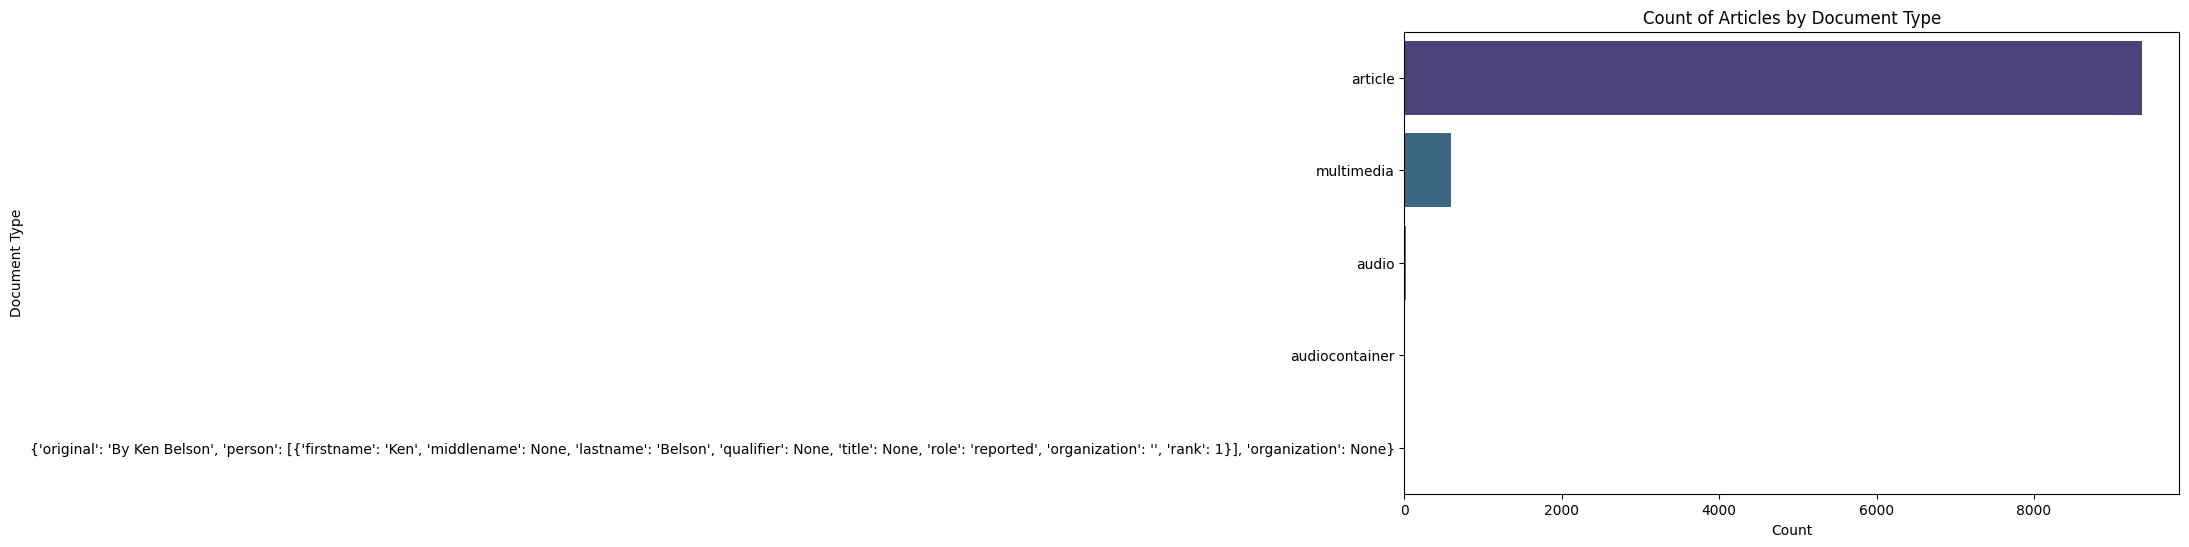

In [4]:
# Count the number of articles per document type
document_type_counts = data['document_type'].value_counts()

# Display the counts
print(document_type_counts)

# Plot the count of articles by document type
plt.figure(figsize=(10, 6))
sns.barplot(x=document_type_counts.values, y=document_type_counts.index, palette='viridis')
plt.title('Count of Articles by Document Type')
plt.xlabel('Count')
plt.ylabel('Document Type')
plt.show()

C:\Users\Usr\AppData\Local\Temp\ipykernel_29528\2036744945.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['year'] = us_data['pub_date'].dt.year
C:\Users\Usr\AppData\Local\Temp\ipykernel_29528\2036744945.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='word_count', data=filtered_us_data, inner=None, palette='viridis')
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c

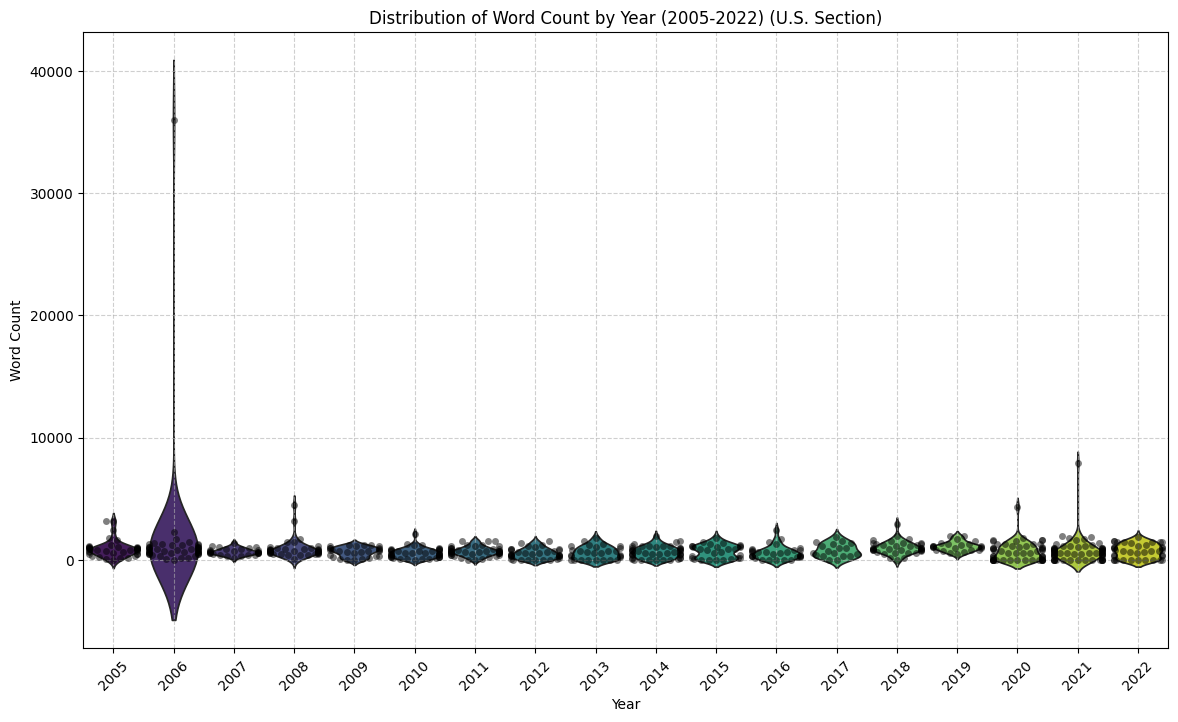

In [5]:
# Convert 'pub_date' to datetime if not already done
data['pub_date'] = pd.to_datetime(data['pub_date'], errors='coerce')

# Extract the year from 'pub_date'
data['year'] = data['pub_date'].dt.year

# Filter the data for 'U.S.' section and extract year
us_data = data[data['section_name'] == 'U.S.']
us_data['year'] = us_data['pub_date'].dt.year

# Further filter data for years between 2005 and 2022
filtered_us_data = us_data[(us_data['year'] >= 2005) & (us_data['year'] <= 2022)]

# Create a violin plot with swarmplot overlay
plt.figure(figsize=(14, 8))
sns.violinplot(x='year', y='word_count', data=filtered_us_data, inner=None, palette='viridis')
sns.swarmplot(x='year', y='word_count', data=filtered_us_data, color='k', alpha=0.5)
plt.title('Distribution of Word Count by Year (2005-2022) (U.S. Section)')
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

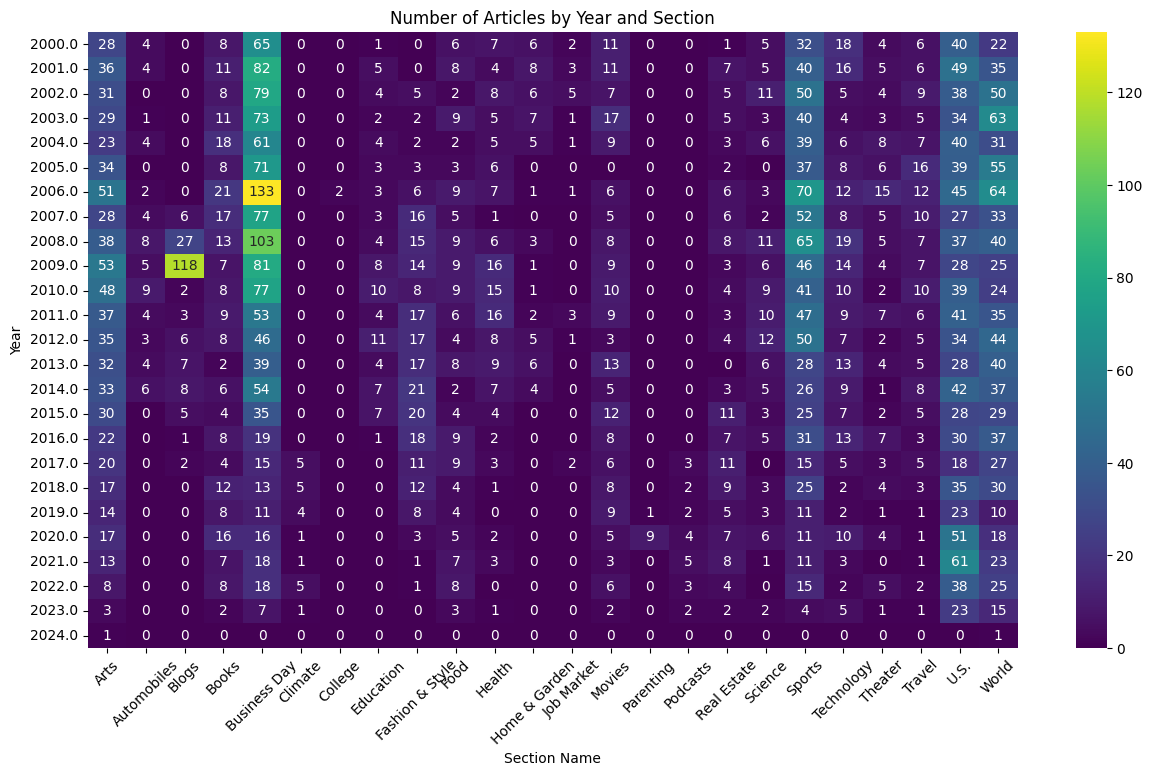

In [6]:

# Convert 'pub_date' to datetime if not already converted
data['pub_date'] = pd.to_datetime(data['pub_date'], errors='coerce')

# Extract the year from 'pub_date'
data['year'] = data['pub_date'].dt.year

# List of sections to include
sections_to_include = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 
                       'Climate', 'Education', 'Fashion & Style', 'Food', 'Health', 
                       'Home & Garden', 'Job Market', 'Movies', 'Parenting', 'Podcasts', 
                       'Real Estate', 'Science', 'Sports', 'Technology', 'Theater', 
                       'Travel', 'U.S.', 'World']

# Filter data to include only the desired sections
filtered_data = data[data['section_name'].isin(sections_to_include)]

# Group by year and section_name, and count occurrences
year_section_counts = filtered_data.groupby(['year', 'section_name']).size().reset_index(name='count')

# Pivot the data to get sections as columns for plotting
year_section_pivot = year_section_counts.pivot(index='year', columns='section_name', values='count').fillna(0)

# Plotting
plt.figure(figsize=(15, 8))
sns.heatmap(year_section_pivot, annot=True, fmt='g', cmap='viridis')
plt.title('Number of Articles by Year and Section')
plt.xlabel('Section Name')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()

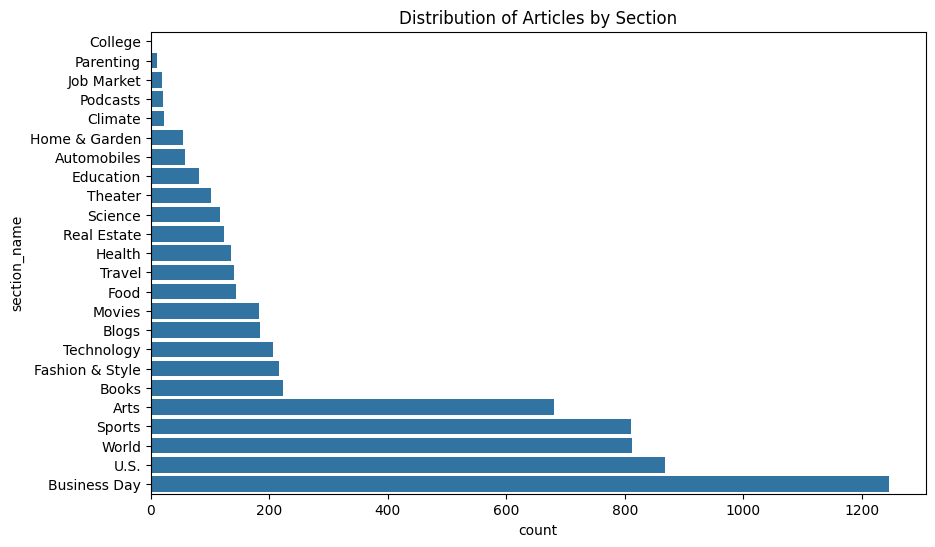

In [7]:
# List of sections to include
sections_to_include = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 
                       'Climate', 'Education', 'Fashion & Style', 'Food', 'Health', 
                       'Home & Garden', 'Job Market', 'Movies', 'Parenting', 'Podcasts', 
                       'Real Estate', 'Science', 'Sports', 'Technology', 'Theater', 
                       'Travel', 'U.S.', 'World']

# Filter the dataset to include only these sections
filtered_data = data[data['section_name'].isin(sections_to_include)]

# Count the occurrences and sort by ascending order
section_counts = filtered_data['section_name'].value_counts()
sorted_sections = section_counts[sections_to_include].sort_values().index

# Plot distribution of articles by section name in ascending order
plt.figure(figsize=(10, 6))
sns.countplot(y='section_name', data=filtered_data, order=sorted_sections)
plt.title('Distribution of Articles by Section')
plt.show()

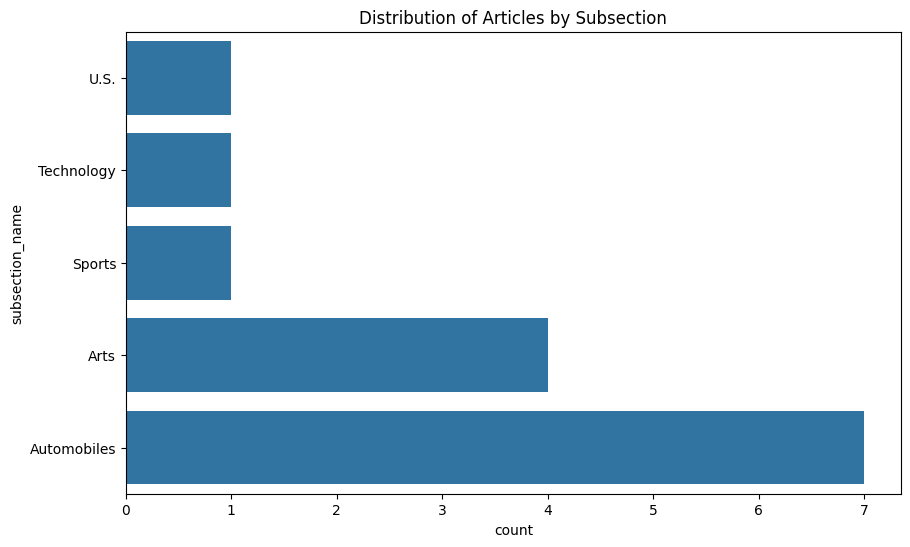

In [8]:
# List of subsections to include
subsections_to_include = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 
                          'Climate', 'Education', 'Fashion & Style', 'Food', 'Health', 
                          'Home & Garden', 'Job Market', 'Movies', 'Parenting', 'Podcasts', 
                          'Real Estate', 'Science', 'Sports', 'Technology', 'Theater', 
                          'Travel', 'U.S.', 'World']

# Filter the dataset to include only subsections that exist in the data
existing_subsections = filtered_data['subsection_name'].unique()
valid_subsections = list(set(subsections_to_include).intersection(existing_subsections))

# Count the occurrences and sort by ascending order
subsection_counts = filtered_data['subsection_name'].value_counts()
sorted_subsections = sorted(valid_subsections, key=lambda x: subsection_counts[x])

# Plot distribution of articles by subsection name in ascending order
plt.figure(figsize=(10, 6))
sns.countplot(y='subsection_name', data=filtered_data, order=sorted_subsections)
plt.title('Distribution of Articles by Subsection')
plt.show()

# Preprocessing and Feature Engineering Pipeline

In [9]:
data = pd.read_csv("C:/Users/Usr/Desktop/AUB Masters/MSBA 315/Final Project/Final_dataset.csv")

## Dropping Non Relevant Columns and Rows

In [10]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['web_url', 'print_section', 'print_page', 'source', 'multimedia', 
                   'document_type', 'news_desk', 'byline', 'type_of_material', '_id', 'uri', 'pub_date', 'word_count', 'subsection_name']
data = data.drop(columns=columns_to_drop)

In [11]:
# Defining the allowed sections
allowed_sections = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 'Climate', 
                    'Education', 'Fashion & Style', 'Food', 'Health', 'Home & Garden', 'Job Market', 
                    'Movies', 'Parenting', 'Podcasts', 'Real Estate', 'Science', 'Sports', 'Technology', 
                    'Theater', 'Travel', 'U.S.', 'World']

# Filtering the rows based on allowed sections
data = data[data['section_name'].isin(allowed_sections)]

## Dropping Null Values

In [12]:
data.dropna(inplace=True)

## Splitting the Data into 'train' and 'test'

In [13]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

## Extracting the Headline of each Article

In [14]:
# Convert string representations of dictionaries to actual dictionaries
train['headline'] = train['headline'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, extract the 'main' key from each dictionary in the 'headline' column
train['main_headline'] = train['headline'].apply(lambda x: x['main'] if 'main' in x else None)

In [15]:
# Convert string representations of dictionaries to actual dictionaries
test['headline'] = test['headline'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, extract the 'main' key from each dictionary in the 'headline' column
test['main_headline'] = test['headline'].apply(lambda x: x['main'] if 'main' in x else None)

## Extracting the Keywords of each Article

In [16]:
# Define a function to safely convert string representations to actual lists
def convert_to_list(keyword_string):
    try:
        return ast.literal_eval(keyword_string) if isinstance(keyword_string, str) else keyword_string
    except (ValueError, SyntaxError):
        return None  # Return None if the string cannot be converted

# Apply this conversion function to the entire 'keywords' column
train['keywords'] = train['keywords'].apply(convert_to_list)


In [17]:
# Apply this conversion function to the entire 'keywords' column
test['keywords'] = test['keywords'].apply(convert_to_list)

In [18]:
def format_keywords(keywords):
    # Ensure that keywords is a list and not None
    if isinstance(keywords, list) and keywords:
        # Extract 'name' and 'value' and format into a string, excluding 'rank' and 'major'
        keyword_strings = [f"{keyword['name']}: {keyword['value']}" for keyword in keywords if 'name' in keyword and 'value' in keyword]
        # Join all strings into a single sentence
        return ', '.join(keyword_strings)
    return None

# Apply the formatting function to the 'keywords' column again
train['keyword_sentences'] = train['keywords'].apply(format_keywords)
# Check the results
print(train['keyword_sentences'].head())

8584    subject: Social Networking (Internet), subject...
9110    glocations: New York City, persons: Juahar, Sa...
536     organizations: Saab AB, subject: Sales, subjec...
954     glocations: Europe, organizations: European Un...
3269    glocations: Russia, persons: Roth, Andrew, glo...
Name: keyword_sentences, dtype: object


In [19]:
# Apply the formatting function to the 'keywords' column again
test['keyword_sentences'] = test['keywords'].apply(format_keywords)

## Combining all the Text into a 'combined_text' Column

In [20]:
# Combine the columns into one
train['combined_text'] = train['main_headline'].astype(str) + " " + train['snippet'].astype(str) + "  " + train['abstract'].astype(str) + " " + train['lead_paragraph'].astype(str) + train['keyword_sentences'].astype(str)

# Check the first few entries to ensure it's combined correctly
print(train['combined_text'].head())

8584    U.S. Embassy in Cairo Scrubs Twitter Feed of L...
9110    Playing Ambulance Roulette Drs Sandeep Jauhar ...
536     Four-Wheeled Wallflowers, Waiting for a Dance ...
954     THE MARKETS: CURRENCIES US dollar falls aainst...
3269    In East Ukraine, Protesters Seek Russian Troop...
Name: combined_text, dtype: object


In [21]:
# Combine the columns into one
test['combined_text'] = test['main_headline'].astype(str) + " " + test['snippet'].astype(str) + "  " + test['abstract'].astype(str) + " " + test['lead_paragraph'].astype(str) + test['keyword_sentences'].astype(str)

# Check the first few entries to ensure it's combined correctly
print(test['combined_text'].head())

2344    Viruses Could Have Your Number Potential for c...
1146    Saudi Arabia Keeps Pumping Oil, Despite Financ...
9915    Biggest Canadian Phone Company Offers to Buy T...
5101    Pressured by Their Base on Abortion, Republica...
2688    The Wine and the Dine Go Hand in Hand Going to...
Name: combined_text, dtype: object


## Dropping the Redundant Columns

In [22]:
# Drop the specified columns
train.drop(columns=['snippet', 'lead_paragraph', 'main_headline', 'abstract', 'keywords', 'keyword_sentences', 'headline'],axis=1, inplace=True)

In [23]:
# Drop the specified columns
test.drop(columns=['snippet', 'lead_paragraph', 'main_headline', 'abstract', 'keywords', 'keyword_sentences', 'headline'],axis=1, inplace=True)

In [24]:
train.head()

,section_name,combined_text
8584,Blogs,U.S. Embassy in Cairo Scrubs Twitter Feed of L...
9110,Health,Playing Ambulance Roulette Drs Sandeep Jauhar ...
536,Automobiles,"Four-Wheeled Wallflowers, Waiting for a Dance ..."
954,Business Day,THE MARKETS: CURRENCIES US dollar falls aainst...
3269,World,"In East Ukraine, Protesters Seek Russian Troop..."


In [25]:
test.head()

,section_name,combined_text
2344,Technology,Viruses Could Have Your Number Potential for c...
1146,Business Day,"Saudi Arabia Keeps Pumping Oil, Despite Financ..."
9915,Business Day,Biggest Canadian Phone Company Offers to Buy T...
5101,U.S.,"Pressured by Their Base on Abortion, Republica..."
2688,Food,The Wine and the Dine Go Hand in Hand Going to...


## Defining the pipeline

### Steps Included in the Pipeline

* Lowercasing combined_text
* Removing special characters from combined_text
* Removing stop words from combined_text
* Tokenizing and stemming the combined_text
* TF-IDF on combined_text
* Label encoding the section_name column
* Dropping columns

In [26]:
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Custom transformer to preprocess text data
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed = X_transformed.str.lower()
        X_transformed = X_transformed.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
        X_transformed = X_transformed.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))
        return X_transformed

# Custom transformer for label encoding
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        return self.encoder.transform(X)

# Feature Pipeline
text_preprocessor = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('tfidf', TfidfVectorizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', text_preprocessor, 'combined_text'),  # Apply TF-IDF to combined_text
    ],
    remainder='drop'  # Drop all columns not explicitly transformed
)

# Cross Validated Models

## Random Forest Model

### Base Random Forest Model

In [27]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier())  # Here, you can replace RandomForestClassifier with any other classifier you want to use
])

# Splitting data
X_train, X_test = train, test
y_train, y_test = train['section_name'], test['section_name']

# Cross-validation on training data
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores:", scores.mean())

# Fit pipeline on entire training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_score_RF_Base = pipeline.score(X_test, y_test)
print("Test score:", test_score_RF_Base)


c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: 0.7105216904320855
Test score: 0.7188373392956959


### Tuned Random Forest Model based on Literature

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Pipeline setup with RandomForestClassifier configured with specific parameters
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined elsewhere in your code
    ('clf', RandomForestClassifier(n_estimators=3000, max_depth=100))  # Customized RandomForest parameters
])

# Splitting data
X_train, X_test = train, test
y_train, y_test = train['section_name'], test['section_name']

# Cross-validation on training data
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores:", scores.mean())

# Fit pipeline on entire training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_score_RF_Literature = pipeline.score(X_test, y_test)
print("Test score:", test_score_RF_Literature)

c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: 0.7167503841238386
Test score: 0.7216321967579653


### Tuned Random Forest Model Using Grid Search

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming 'preprocessor' is defined elsewhere in your code as a transformer or a pipeline

# Parameter grid for Random Forest
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__bootstrap': [True, False]
}

# Pipeline for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier())
])

# Set up the grid search with cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Splitting data
X_train, X_test = train, test
y_train, y_test = train['section_name'], test['section_name']

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test data using the best model
test_score_RF_Grid = grid_search.score(X_test, y_test)
print("Test score with best parameters:", test_score_RF_Grid)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usr\AppData

Best parameters: {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 300}
Best cross-validation score: 0.73
Test score with best parameters: 0.727780883174958


## Logistic Regression

### Base Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression

# Pipeline for Logistic Regression
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())  # Now using Logistic Regression
])

# Splitting data
X_train, X_test = train, test
y_train, y_test = train['section_name'], test['section_name']

# Cross-validation for Logistic Regression
logistic_scores = cross_val_score(logistic_pipeline, X_train, y_train, cv=5)
print("Logistic Regression cross-validation scores:", logistic_scores.mean())

# Fit pipeline on entire training data for Logistic Regression
logistic_pipeline.fit(X_train, y_train)

# Evaluate on test data for Logistic Regression
test_score_LR_Base = logistic_pipeline.score(X_test, y_test)
print("Logistic Regression test score:", test_score_LR_Base)


c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression cross-validation scores: 0.6388655781961258
Logistic Regression test score: 0.660145332588038


### Tuned Logistic Regression Model based on Literature

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from tqdm import tqdm

# Assuming preprocessor is defined somewhere in your code as a transformer or a pipeline
# For example, you might have:
# preprocessor = ColumnTransformer(transformers=[...], remainder='passthrough')

# Set up the pipeline with Logistic Regression configured with specific parameters
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use your defined preprocessor
    ('clf', LogisticRegression(solver='saga', C=2.8))  # Logistic Regression with specific settings
])

# Assuming you have your data in 'train' and 'test' DataFrames
X_train, X_test = train.drop('section_name', axis=1), test.drop('section_name', axis=1)
y_train, y_test = train['section_name'], test['section_name']

# Cross-validation on training data with progress bar
scores = []
kf = KFold(n_splits=5)  # Initialize KFold
for train_index, test_index in tqdm(kf.split(X_train), desc="Cross-validation"):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    pipeline.fit(X_train_fold, y_train_fold)
    score = pipeline.score(X_test_fold, y_test_fold)
    scores.append(score)
print("Logistic Regression cross-validation scores:", np.mean(scores))

# Fit the pipeline on the entire training data
pipeline.fit(X_train, y_train)

# Evaluate on the test data
test_score_LR_Literature = pipeline.score(X_test, y_test)
print("Logistic Regression test score:", test_score_LR_Literature)



Cross-validation: 0it [00:00, ?it/s]c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Cross-validation: 1it [00:02,  2.60s/it]c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Cross-validation: 3it [00:07,  2.61s/it]c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Cross-validation: 4it [00:10,  2.62s/it]c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Cross-validation: 5i

Logistic Regression cross-validation scores: 0.6973382730940996
Logistic Regression test score: 0.7149245388485187


### Tuned Logistic Regression Model Based on Grid Search

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Assuming 'preprocessor' is defined elsewhere in your code as a transformer or a pipeline

# Define the pipeline
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=10000))  # Extended max_iter for convergence with grid search
])

# Parameters grid to search
param_grid = {
    'clf__solver': ['lbfgs', 'saga'],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2', 'l1', 'none'],  # 'elasticnet' requires 'l1_ratio', which we haven't defined
    'clf__class_weight': [None, 'balanced']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Assuming you have your data frames already split
X_train, X_test = train.drop('section_name', axis=1), test.drop('section_name', axis=1)
y_train, y_test = train['section_name'], test['section_name']

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test data using the best model
test_score_LR_Grid = grid_search.score(X_test, y_test)
print("Test score with best parameters:", test_score_LR_Grid)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usr\AppData\L

Best parameters: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best cross-validation score: 0.74
Test score with best parameters: 0.7473448854108441


## KNN model

###  Base KNN Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Pipeline for K-Nearest Neighbors
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', KNeighborsClassifier())  # Now using KNN
])

# Splitting data
X_train, X_test = train, test
y_train, y_test = train['section_name'], test['section_name']

# Cross-validation for K-Nearest Neighbors
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5)
print("K-Nearest Neighbors cross-validation scores:", knn_scores.mean())

# Fit pipeline on entire training data for K-Nearest Neighbors
knn_pipeline.fit(X_train, y_train)

# Evaluate on test data for K-Nearest Neighbors
test_score_KNN_Base = knn_pipeline.score(X_test, y_test)
print("K-Nearest Neighbors test score:", test_score_KNN_Base)



c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


K-Nearest Neighbors cross-validation scores: 0.612748029121613
K-Nearest Neighbors test score: 0.6277249860257127


### Tuned KNN Model Based on Literature

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from tqdm import tqdm

# Assuming 'preprocessor' is defined elsewhere in your code as a transformer or a pipeline
# For example, you might have:
# preprocessor = ColumnTransformer(transformers=[...], remainder='passthrough')

# Pipeline for K-Nearest Neighbors configured with K=9
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use your defined preprocessor
    ('clf', KNeighborsClassifier(n_neighbors=9))  # KNN with K=9
])

# Assuming you have your data in 'train' and 'test' DataFrames
X_train, X_test = train.drop('section_name', axis=1), test.drop('section_name', axis=1)
y_train, y_test = train['section_name'], test['section_name']

# Cross-validation on training data with progress bar
scores = []
kf = KFold(n_splits=5)  # Initialize KFold
for train_index, test_index in tqdm(kf.split(X_train), desc="Cross-validation"):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn_pipeline.fit(X_train_fold, y_train_fold)
    score = knn_pipeline.score(X_test_fold, y_test_fold)
    scores.append(score)
print("K-Nearest Neighbors cross-validation scores:", np.mean(scores))

# Fit the pipeline on the entire training data
knn_pipeline.fit(X_train, y_train)

# Evaluate on the test data
test_score_KNN_Literature = knn_pipeline.score(X_test, y_test)
print("K-Nearest Neighbors test score:", test_score_KNN_Literature)

Cross-validation: 5it [00:02,  1.82it/s]


K-Nearest Neighbors cross-validation scores: 0.6419804994327891
K-Nearest Neighbors test score: 0.6383454443823365


### Tuned KNN Model Based on Grid Search

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

# Assuming 'preprocessor' is defined elsewhere in your code as a transformer or a pipeline


param_grid = {
    'clf__n_neighbors': [3, 5, 7, 10],  # Fewer neighbors to avoid high-dimensionality curse
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Pipeline for K-Nearest Neighbors
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', KNeighborsClassifier())
])

# Set up the grid search with cross-validation
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Splitting data
X_train_grid, X_test_grid = train, test
y_train_grid, y_test_grid = train['section_name'], test['section_name']

# Perform the grid search
grid_search.fit(X_train_grid, y_train_grid)

# Best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test data using the best model
test_score_KNN_Grid= grid_search.score(X_test_grid, y_test_grid)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.56194575 0.57320611 0.61274803 0.62305088 0.63335401 0.64293772
 0.64317753 0.66018955        nan 0.11047172        nan 0.1102322
        nan 0.11838051        nan 0.11382961 0.56194575 0.57320611
 0.61274803 0.62305088 0.63335401 0.64293772 0.64317753 0.66018955
        nan 0.11047172        nan 0.1102322         nan 0.11838051
        nan 0.11382961 0.56194575 0.57320611 0.61274803 0.62305088
 0.63335401 0.64293772 0.64317753 0.66018955        nan 0.11047172
        nan 0.1102322         nan 0.11838051        nan 0.11382961
 0.56194575 0.57320611 0.61274803 0.62305088 0.63335401 0.64293772
 0.6

Best parameters: {'clf__algorithm': 'auto', 'clf__metric': 'euclidean', 'clf__n_neighbors': 10, 'clf__weights': 'distance'}
Best cross-validation score: 0.66


## XGboost Model

### Base XGboost Model

In [43]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier())  # Now using XGBoost
])

label_encoder = LabelEncoderTransformer()  # Initialize and fit the custom label encoder
y_train_encoded = label_encoder.fit_transform(train['section_name'])
y_test_encoded = label_encoder.transform(test['section_name'])

# Splitting data
X_train, X_test = train, test
y_train, y_test = train['section_name'], test['section_name']


# Cross-validation for XGBoost
xgb_scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=5)
print("XGBoost cross-validation scores:", xgb_scores.mean())

# Fit pipeline on entire training data
pipeline.fit(X_train, y_train_encoded)

# Evaluate on test data
test_score_XGB_Base = pipeline.score(X_test, y_test_encoded)
print("XGBoost test score:", test_score_XGB_Base)

c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which mean

XGBoost cross-validation scores: 0.6990149198006865
XGBoost test score: 0.7149245388485187


### Tuned XGboost Model Based on Literature

In [41]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'preprocessor' is defined elsewhere in the code and correctly configured
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=5))
])

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train['section_name'])
y_test_encoded = label_encoder.transform(test['section_name'])  # Use transform here, not fit_transform

# Splitting data
X_train, X_test = train, test
y_train, y_test = y_train_encoded, y_test_encoded  # Use encoded labels for operations

# Cross-validation for XGBoost
xgb_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5)  # Use y_train here, which is now y_train_encoded
print("XGBoost cross-validation scores:", xgb_scores.mean())

# Fit pipeline on entire training data
xgb_pipeline.fit(X_train, y_train)  # Use y_train which is now y_train_encoded

# Evaluate on test data
test_score_XGB_Literature = xgb_pipeline.score(X_test, y_test)  # Use y_test which is now y_test_encoded
print("XGBoost test score:", test_score_XGB_Literature)

c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


XGBoost cross-validation scores: 0.7088476284840391
XGBoost test score: 0.7261039686975964


### Tuned XGboost Model Based on Grid Search

In [47]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Assuming 'preprocessor' is defined elsewhere in your code as a transformer or a pipeline

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train['section_name'])
y_test_encoded = label_encoder.transform(test['section_name'])

# Update num_class dynamically based on unique classes in y_train_encoded
params = {
    'clf__max_depth': [3, 4, 5],  # Exploring depths around your initial choice
    'clf__learning_rate': [0.05, 0.1, 0.2],  # eta alias
    'clf__objective': ['multi:softmax'],
    'clf__num_class': [len(set(y_train_encoded))],  # Ensure unique count from encoded labels
    'clf__eval_metric': ['mlogloss']
}

# Pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False))
])

# Set up the grid search with cross-validation
grid_search_xgb = GridSearchCV(xgb_pipeline, params, cv=5, verbose=1, n_jobs=-1)

# Splitting data (ensure you are using the encoded labels for y_train)
X_train, X_test = train, test
y_train, y_test = y_train_encoded, y_test_encoded

# Perform the grid search
grid_search_xgb.fit(X_train, y_train)

# Best parameters and best score from the grid search
print("Best parameters:", grid_search_xgb.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_xgb.best_score_))

# Evaluate on the test data using the best model
test_score_XGB_Grid = grid_search_xgb.score(X_test, y_test)
print("XGBoost test score:", test_score_XGB_Grid)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'clf__eval_metric': 'mlogloss', 'clf__learning_rate': 0.2, 'clf__max_depth': 4, 'clf__num_class': 24, 'clf__objective': 'multi:softmax'}
Best cross-validation score: 0.71
XGBoost test score: 0.7255449972051425


# Results Table

In [48]:
import pandas as pd

# Create a dictionary to store the data
comparison = {
    'Model': ['Random Forest', 'Random Forest', 'Random Forest', 
              'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 
              'K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors', 
              'XGBoost', 'XGBoost', 'XGBoost'],
    'Parameter_Set': ['Base', 'Literature', 'Grid'] * 4,
    'Test_Score': [
        test_score_RF_Base, test_score_RF_Literature, test_score_RF_Grid,
        test_score_LR_Base, test_score_LR_Literature, test_score_LR_Grid,
        test_score_KNN_Base, test_score_KNN_Literature, test_score_KNN_Grid,
        test_score_XGB_Base, test_score_XGB_Literature, test_score_XGB_Grid
    ]
}

# Create a DataFrame
comparison_df = pd.DataFrame(comparison)

# Display the DataFrame
print(comparison_df)

                  Model Parameter_Set  Test_Score
0         Random Forest          Base    0.718837
1         Random Forest    Literature    0.721632
2         Random Forest          Grid    0.727781
3   Logistic Regression          Base    0.660145
4   Logistic Regression    Literature    0.714925
5   Logistic Regression          Grid    0.747345
6   K-Nearest Neighbors          Base    0.627725
7   K-Nearest Neighbors    Literature    0.638345
8   K-Nearest Neighbors          Grid    0.665176
9               XGBoost          Base    0.714925
10              XGBoost    Literature    0.726104
11              XGBoost          Grid    0.725545


# Neural Network Models

## LLM Models - BERT

In [52]:
data = pd.read_csv("C:/Users/Usr/Desktop/AUB Masters/MSBA 315/Final Project/Final_dataset.csv")

In [53]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['web_url', 'print_section', 'print_page', 'source', 'multimedia', 
                   'document_type', 'news_desk', 'byline', 'type_of_material', '_id', 'uri', 'pub_date', 'word_count', 'subsection_name']
data = data.drop(columns=columns_to_drop)

In [54]:
# Defining the allowed sections
allowed_sections = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 'Climate', 
                    'Education', 'Fashion & Style', 'Food', 'Health', 'Home & Garden', 'Job Market', 
                    'Movies', 'Parenting', 'Podcasts', 'Real Estate', 'Science', 'Sports', 'Technology', 
                    'Theater', 'Travel', 'U.S.', 'World']

# Filtering the rows based on allowed sections
data = data[data['section_name'].isin(allowed_sections)]

In [55]:
data.dropna(inplace=True)

In [56]:
# Convert string representations of dictionaries to actual dictionaries
data['headline'] = data['headline'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, extract the 'main' key from each dictionary in the 'headline' column
data['main_headline'] = data['headline'].apply(lambda x: x['main'] if 'main' in x else None)

# Check the first few entries of the main_headline to confirm success
print(data['main_headline'].head())

2    ‘It’s a Weird Feeling’: Seattle Hunkers Down A...
4    With Bombing, Iraqis Escalate Guerrilla Tactic...
5          U.S. Team Loses More Players for Qualifiers
6    Displaying the Discreet Charm and Casual Grace...
8    A New Bible, Palmtop Version, Can Keep Track o...
Name: main_headline, dtype: object


In [57]:
# Define a function to safely convert string representations to actual lists
def convert_to_list(keyword_string):
    try:
        return ast.literal_eval(keyword_string) if isinstance(keyword_string, str) else keyword_string
    except (ValueError, SyntaxError):
        return None  # Return None if the string cannot be converted

# Apply this conversion function to the entire 'keywords' column
data['keywords'] = data['keywords'].apply(convert_to_list)

In [58]:
def format_keywords(keywords):
    # Ensure that keywords is a list and not None
    if isinstance(keywords, list) and keywords:
        # Extract 'name' and 'value' and format into a string, excluding 'rank' and 'major'
        keyword_strings = [f"{keyword['name']}: {keyword['value']}" for keyword in keywords if 'name' in keyword and 'value' in keyword]
        # Join all strings into a single sentence
        return ', '.join(keyword_strings)
    return None

# Apply the formatting function to the 'keywords' column again
data['keyword_sentences'] = data['keywords'].apply(format_keywords)
# Check the results
print(data['keyword_sentences'].head())

2    subject: Coronavirus (2019-nCoV), subject: Tel...
4    glocations: Iraq, glocations: Najaf (Iraq), gl...
5    persons: Castillo, Edgar, persons: Donovan, La...
6    persons: Louis, Murray, organizations: Common ...
8    organizations: PALM INCORPORATED, organization...
Name: keyword_sentences, dtype: object


In [61]:
# Combine the columns into one
data['combined_text'] = data['main_headline'].astype(str) + " " + data['snippet'].astype(str) + "  " + data['abstract'].astype(str) + " " + data['lead_paragraph'].astype(str) + data['keyword_sentences'].astype(str)

# Check the first few entries to ensure it's combined correctly
print(data['combined_text'].head())

2    ‘It’s a Weird Feeling’: Seattle Hunkers Down A...
4    With Bombing, Iraqis Escalate Guerrilla Tactic...
5    U.S. Team Loses More Players for Qualifiers Th...
6    Displaying the Discreet Charm and Casual Grace...
8    A New Bible, Palmtop Version, Can Keep Track o...
Name: combined_text, dtype: object


In [62]:
# Define a function to make text lowercase
def lowercase_text(text):
    return text.lower()

# Apply preprocessing to each text column
data['combined_text'] = data['combined_text'].apply(lowercase_text)

# Print the first few rows to verify the result
print(data.head())

                                            abstract  \
2  County officials have urged people to telecomm...   
4  Suicide attack that kills four Army solders at...   
5  The U.S. men’s soccer team’s top two left back...   
6  The DancenOw/NYC Festival may now be confined ...   
8  Software from Zondervan Publishing, Laridian E...   

                                             snippet  \
2  County officials have urged people to telecomm...   
4  Suicide attack that kills four Army solders at...   
5  The U.S. men’s soccer team’s top two left back...   
6  The DancenOw/NYC Festival may now be confined ...   
8  Software from Zondervan Publishing, Laridian E...   

                                      lead_paragraph  \
2  SEATTLE — Just after dawn on Thursday morning,...   
4  The explosion of a bomb in a taxi that killed ...   
5  With the United States national team preparing...   
6  The DancenOw/NYC Festival may now be confined ...   
8  Bible readers who study scripture on hand-h

In [65]:
# Drop the specified columns
data.drop(columns=['snippet', 'lead_paragraph', 'main_headline', 'abstract', 'keywords','keyword_sentences', 'headline'],axis=1, inplace=True)

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # Import tqdm for progress bar

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text and convert to numerical format
def tokenize_and_encode(text, max_length):
    encoded_text = tokenizer.encode_plus(
        text,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='pt'  # Return PyTorch tensors
    )
    return encoded_text['input_ids'], encoded_text['attention_mask']

# Define BERT model
num_labels = len(data['section_name'].unique())
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    output_attentions=False,
    output_hidden_states=False,
)

# Convert labels to numerical format
label2id = {label: i for i, label in enumerate(data['section_name'].unique())}
train_data['label'] = train_data['section_name'].map(label2id)
test_data['label'] = test_data['section_name'].map(label2id)

# Tokenize and encode train and test data
max_length = 128  # Maximum sequence length
train_input_ids, train_attention_mask = zip(*train_data['combined_text'].apply(lambda x: tokenize_and_encode(x, max_length)))
test_input_ids, test_attention_mask = zip(*test_data['combined_text'].apply(lambda x: tokenize_and_encode(x, max_length)))

# Convert to PyTorch tensors
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_mask = torch.cat(train_attention_mask, dim=0)
train_labels = torch.tensor(train_data['label'].values)

test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_mask = torch.cat(test_attention_mask, dim=0)
test_labels = torch.tensor(test_data['label'].values)

# Create DataLoader for train and test sets
batch_size = 32
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Train BERT model
epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

for epoch in range(epochs):
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{epochs}', leave=False)
    for batch in progress_bar:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        progress_bar.set_postfix({'Loss': loss.item()})

# Evaluate BERT model
model.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    progress_bar = tqdm(test_dataloader, desc='Evaluation', leave=False)
    for batch in progress_bar:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels.extend(logits.argmax(dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy_BERT = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy_BERT)

c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:521: FutureWarni

Accuracy: 0.7619446772841576


## Neural Network Sequential

In [68]:
data = pd.read_csv("C:/Users/Usr/Desktop/AUB Masters/MSBA 315/Final Project/Final_dataset.csv")

In [69]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['web_url', 'print_section', 'print_page', 'source', 'multimedia', 
                   'document_type', 'news_desk', 'byline', 'type_of_material', '_id', 'uri', 'pub_date', 'word_count', 'subsection_name']
data = data.drop(columns=columns_to_drop)

In [71]:
# Defining the allowed sections
allowed_sections = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 'Climate', 
                    'Education', 'Fashion & Style', 'Food', 'Health', 'Home & Garden', 'Job Market', 
                    'Movies', 'Parenting', 'Podcasts', 'Real Estate', 'Science', 'Sports', 'Technology', 
                    'Theater', 'Travel', 'U.S.', 'World']

# Filtering the rows based on allowed sections
data = data[data['section_name'].isin(allowed_sections)]

In [72]:
data.dropna(inplace=True)

In [73]:
# Convert string representations of dictionaries to actual dictionaries
data['headline'] = data['headline'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, extract the 'main' key from each dictionary in the 'headline' column
data['main_headline'] = data['headline'].apply(lambda x: x['main'] if 'main' in x else None)

# Check the first few entries of the main_headline to confirm success
print(data['main_headline'].head())

2    ‘It’s a Weird Feeling’: Seattle Hunkers Down A...
4    With Bombing, Iraqis Escalate Guerrilla Tactic...
5          U.S. Team Loses More Players for Qualifiers
6    Displaying the Discreet Charm and Casual Grace...
8    A New Bible, Palmtop Version, Can Keep Track o...
Name: main_headline, dtype: object


In [74]:
# Define a function to safely convert string representations to actual lists
def convert_to_list(keyword_string):
    try:
        return ast.literal_eval(keyword_string) if isinstance(keyword_string, str) else keyword_string
    except (ValueError, SyntaxError):
        return None  # Return None if the string cannot be converted

# Apply this conversion function to the entire 'keywords' column
data['keywords'] = data['keywords'].apply(convert_to_list)

In [75]:
def format_keywords(keywords):
    # Ensure that keywords is a list and not None
    if isinstance(keywords, list) and keywords:
        # Extract 'name' and 'value' and format into a string, excluding 'rank' and 'major'
        keyword_strings = [f"{keyword['name']}: {keyword['value']}" for keyword in keywords if 'name' in keyword and 'value' in keyword]
        # Join all strings into a single sentence
        return ', '.join(keyword_strings)
    return None

# Apply the formatting function to the 'keywords' column again
data['keyword_sentences'] = data['keywords'].apply(format_keywords)
# Check the results
print(data['keyword_sentences'].head())

2    subject: Coronavirus (2019-nCoV), subject: Tel...
4    glocations: Iraq, glocations: Najaf (Iraq), gl...
5    persons: Castillo, Edgar, persons: Donovan, La...
6    persons: Louis, Murray, organizations: Common ...
8    organizations: PALM INCORPORATED, organization...
Name: keyword_sentences, dtype: object


In [77]:
# Combine the columns into one
data['combined_text'] = data['main_headline'].astype(str) + " " + data['snippet'].astype(str) + "  " + data['abstract'].astype(str) + " " + data['lead_paragraph'].astype(str) + data['keyword_sentences'].astype(str)

# Check the first few entries to ensure it's combined correctly
print(data['combined_text'].head())

2    ‘It’s a Weird Feeling’: Seattle Hunkers Down A...
4    With Bombing, Iraqis Escalate Guerrilla Tactic...
5    U.S. Team Loses More Players for Qualifiers Th...
6    Displaying the Discreet Charm and Casual Grace...
8    A New Bible, Palmtop Version, Can Keep Track o...
Name: combined_text, dtype: object


In [78]:
# Define a function to make text lowercase
def lowercase_text(text):
    return text.lower()

# Apply preprocessing to each text column
data['combined_text'] = data['combined_text'].apply(lowercase_text)

# Print the first few rows to verify the result
print(data.head())

                                            abstract  \
2  County officials have urged people to telecomm...   
4  Suicide attack that kills four Army solders at...   
5  The U.S. men’s soccer team’s top two left back...   
6  The DancenOw/NYC Festival may now be confined ...   
8  Software from Zondervan Publishing, Laridian E...   

                                             snippet  \
2  County officials have urged people to telecomm...   
4  Suicide attack that kills four Army solders at...   
5  The U.S. men’s soccer team’s top two left back...   
6  The DancenOw/NYC Festival may now be confined ...   
8  Software from Zondervan Publishing, Laridian E...   

                                      lead_paragraph  \
2  SEATTLE — Just after dawn on Thursday morning,...   
4  The explosion of a bomb in a taxi that killed ...   
5  With the United States national team preparing...   
6  The DancenOw/NYC Festival may now be confined ...   
8  Bible readers who study scripture on hand-h

In [80]:
# Drop the specified columns
data.drop(columns=['snippet', 'lead_paragraph', 'main_headline', 'abstract', 'keywords', 'keyword_sentences', 'headline'],axis=1, inplace=True)

In [81]:
data.head()

,section_name,combined_text
2,U.S.,‘it’s a weird feeling’: seattle hunkers down a...
4,World,"with bombing, iraqis escalate guerrilla tactic..."
5,Sports,u.s. team loses more players for qualifiers th...
6,Arts,displaying the discreet charm and casual grace...
8,Books,"a new bible, palmtop version, can keep track o..."


In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['combined_text'])
sequences = tokenizer.texts_to_sequences(data['combined_text'])

# Padding
max_len = 1000  # Adjust maximum sequence length based on your data
X = pad_sequences(sequences, maxlen=max_len)

# Loading FastText embeddings
embeddings_index = {}
fasttext_file = "C:\\Users\\Usr\\Downloads\\wiki-news-300d-1M.vec (1)\\wiki-news-300d-1M.vec" # Update this path to your FastText file
with open(fasttext_file, 'r', encoding='utf-8') as f:
    next(f)  # Skip the first line if it contains header info (e.g., number of tokens and dimensions)
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Mapping tokens to embeddings
embedding_dim = 300  # Adjust the embedding dimension based on the FastText embeddings you're using
word_index = tokenizer.word_index
num_words = min(len(word_index) + 1, len(embeddings_index))
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Splitting data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, data['section_name'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder

# Assuming you've already loaded your data and created the embedding_matrix correctly

# Encoding the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(data['section_name'])
num_classes = len(set(y_encoded))  # Ensuring we get the right number of unique labels

# Prepare the dataset
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define the model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, trainable=False, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix)),  # Proper initialization
    SpatialDropout1D(0.2),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss_NeuralNetwork, test_accuracy_NeuralNetwork = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss_NeuralNetwork)
print("Test Accuracy:", test_accuracy_NeuralNetwork)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.2061 - loss: 2.6788 - val_accuracy: 0.5319 - val_loss: 1.6968
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 245ms/step - accuracy: 0.5218 - loss: 1.7533 - val_accuracy: 0.6141 - val_loss: 1.4178
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 257ms/step - accuracy: 0.5979 - loss: 1.4550 - val_accuracy: 0.6527 - val_loss: 1.2463
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 264ms/step - accuracy: 0.6290 - loss: 1.2931 - val_accuracy: 0.6829 - val_loss: 1.1723
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - accuracy: 0.6548 - loss: 1.1823 - val_accuracy: 0.7148 - val_loss: 1.0570
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 246ms/step - accuracy: 0.6819 - loss: 1.1033 - val_accuracy: 0.7215 - val_loss: 1.0923
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 249ms/step - accuracy: 0.7043 - loss: 1.0722 - val_accuracy: 0.7215 - val_loss: 1.0168
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 248ms/step - accuracy: 0.7215 - loss: 0

# Updated Results Table

In [ ]:
# Replace with the actual accuracy value
test_accuracy_NeuralNetwork=0.7185929417610168


# Appending BERT and Neural Network accuracies directly to the DataFrame
new_data = pd.DataFrame({
    'Model': ['BERT', 'Neural Network'],
    'Parameter_Set': ['Base', 'Base'],
    'Test_Score': [accuracy_BERT, test_accuracy_NeuralNetwork]
})

# Use pd.concat to add the new data to the existing DataFrame
comparison_df = pd.concat([comparison_df, new_data], ignore_index=True)


In [113]:

# Display the updated DataFrame
print(comparison_df)

                  Model Parameter_Set  Test_Score
0         Random Forest          Base    0.718837
1         Random Forest    Literature    0.721632
2         Random Forest          Grid    0.727781
3   Logistic Regression          Base    0.660145
4   Logistic Regression    Literature    0.714925
5   Logistic Regression          Grid    0.747345
6   K-Nearest Neighbors          Base    0.627725
7   K-Nearest Neighbors    Literature    0.638345
8   K-Nearest Neighbors          Grid    0.665176
9               XGBoost          Base    0.714925
10              XGBoost    Literature    0.726104
11              XGBoost          Grid    0.725545
12                 BERT          Base    0.761945
13       Neural Network          Base    0.718593


In [116]:
# Sort the DataFrame by 'Test_Score' in descending order
sorted_df = comparison_df.sort_values('Test_Score', ascending=False)

# Display the sorted DataFrame
print(sorted_df)

                  Model Parameter_Set  Test_Score
12                 BERT          Base    0.761945
5   Logistic Regression          Grid    0.747345
2         Random Forest          Grid    0.727781
10              XGBoost    Literature    0.726104
11              XGBoost          Grid    0.725545
1         Random Forest    Literature    0.721632
0         Random Forest          Base    0.718837
13       Neural Network          Base    0.718593
4   Logistic Regression    Literature    0.714925
9               XGBoost          Base    0.714925
8   K-Nearest Neighbors          Grid    0.665176
3   Logistic Regression          Base    0.660145
7   K-Nearest Neighbors    Literature    0.638345
6   K-Nearest Neighbors          Base    0.627725


# Optimized Bert

In [131]:
data_2 = pd.read_csv("C:\\Users\\Usr\\Desktop\\AUB Masters\\MSBA 315\\Final Project\\newestnewnewbalance_dataset.csv")

In [132]:
data_2.shape

(50000, 20)

In [133]:
# Load your dataset into a DataFrame named 'data' (assuming you have already loaded it)

# Define features to balance
features_to_balance = ['section_name', 'type_of_material', 'news_desk']

# Calculate value counts for each feature
value_counts = {}
for feature in features_to_balance:
    value_counts[feature] = data_2[feature].value_counts()

# Determine minimum target counts for each feature
min_target_counts = {feature: value_counts[feature].min() for feature in features_to_balance}

# Set desired sample size
desired_sample_size = 20000

# Initialize balanced dataset
balanced_dataset = pd.DataFrame()

# Iterate through features to balance
for feature in tqdm(features_to_balance):
    unique_values = value_counts[feature].index
    # Iterate through unique values of the feature
    for unique_value in unique_values:
        if len(balanced_dataset) >= desired_sample_size:
            break  # Stop when the desired sample size is reached
        samples_to_select = min_target_counts[feature]
        selected_indices = data_2[data_2[feature] == unique_value].sample(min(samples_to_select, desired_sample_size - len(balanced_dataset)), random_state=42).index
        balanced_dataset = pd.concat([balanced_dataset, data_2.loc[selected_indices]])

# Check if desired sample size is not reached and oversample
remaining_samples = desired_sample_size - len(balanced_dataset)
if remaining_samples > 0:
    oversample_indices = data_2.sample(remaining_samples).index
    balanced_dataset = pd.concat([balanced_dataset, data_2.loc[oversample_indices]])

100%|██████████| 3/3 [00:03<00:00,  1.05s/it]


In [134]:
data_2 = balanced_dataset
del balanced_dataset

In [135]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['web_url', 'print_section', 'print_page', 'source', 'multimedia', 
                   'document_type', 'news_desk', 'byline', 'type_of_material', '_id', 'uri', 'pub_date', 'word_count', 'subsection_name']
data_2 = data_2.drop(columns=columns_to_drop)

In [136]:
# Defining the allowed sections
allowed_sections = ['Arts', 'Automobiles', 'Blogs', 'Books', 'Business Day', 'College', 'Climate', 
                    'Education', 'Fashion & Style', 'Food', 'Health', 'Home & Garden', 'Job Market', 
                    'Movies', 'Parenting', 'Podcasts', 'Real Estate', 'Science', 'Sports', 'Technology', 
                    'Theater', 'Travel', 'U.S.', 'World']

# Filtering the rows based on allowed sections
data_2 = data_2[data_2['section_name'].isin(allowed_sections)]

In [137]:
data_2.dropna(inplace=True)

In [138]:
# Convert string representations of dictionaries to actual dictionaries
data_2['headline'] = data_2['headline'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, extract the 'main' key from each dictionary in the 'headline' column
data_2['main_headline'] = data_2['headline'].apply(lambda x: x['main'] if 'main' in x else None)

# Check the first few entries of the main_headline to confirm success
print(data_2['main_headline'].head())

42082    ‘It’s a Weird Feeling’: Seattle Hunkers Down A...
45004    With Bombing, Iraqis Escalate Guerrilla Tactic...
14331          U.S. Team Loses More Players for Qualifiers
14535    Displaying the Discreet Charm and Casual Grace...
29269    A New Bible, Palmtop Version, Can Keep Track o...
Name: main_headline, dtype: object


In [139]:
# Define a function to safely convert string representations to actual lists
def convert_to_list(keyword_string):
    try:
        return ast.literal_eval(keyword_string) if isinstance(keyword_string, str) else keyword_string
    except (ValueError, SyntaxError):
        return None  # Return None if the string cannot be converted

# Apply this conversion function to the entire 'keywords' column
data_2['keywords'] = data_2['keywords'].apply(convert_to_list)

In [140]:
def format_keywords(keywords):
    # Ensure that keywords is a list and not None
    if isinstance(keywords, list) and keywords:
        # Extract 'name' and 'value' and format into a string, excluding 'rank' and 'major'
        keyword_strings = [f"{keyword['name']}: {keyword['value']}" for keyword in keywords if 'name' in keyword and 'value' in keyword]
        # Join all strings into a single sentence
        return ', '.join(keyword_strings)
    return None

# Apply the formatting function to the 'keywords' column again
data_2['keyword_sentences'] = data_2['keywords'].apply(format_keywords)
# Check the results
print(data_2['keyword_sentences'].head())

42082    subject: Coronavirus (2019-nCoV), subject: Tel...
45004    glocations: Iraq, glocations: Najaf (Iraq), gl...
14331    persons: Castillo, Edgar, persons: Donovan, La...
14535    persons: Louis, Murray, organizations: Common ...
29269    organizations: PALM INCORPORATED, organization...
Name: keyword_sentences, dtype: object


In [141]:
# Combine the columns into one
data_2['combined_text'] = data_2['main_headline'].astype(str) + " " + data_2['snippet'].astype(str) + "  " + data_2['abstract'].astype(str) + " " + data_2['lead_paragraph'].astype(str) + data_2['keyword_sentences'].astype(str)

# Check the first few entries to ensure it's combined correctly
print(data_2['combined_text'].head())

42082    ‘It’s a Weird Feeling’: Seattle Hunkers Down A...
45004    With Bombing, Iraqis Escalate Guerrilla Tactic...
14331    U.S. Team Loses More Players for Qualifiers Th...
14535    Displaying the Discreet Charm and Casual Grace...
29269    A New Bible, Palmtop Version, Can Keep Track o...
Name: combined_text, dtype: object


In [142]:
# Define a function to make text lowercase
def lowercase_text(text):
    return text.lower()

# Apply preprocessing to each text column
data_2['combined_text'] = data_2['combined_text'].apply(lowercase_text)

# Print the first few rows to verify the result
print(data_2.head())

                                                abstract  \
42082  County officials have urged people to telecomm...   
45004  Suicide attack that kills four Army solders at...   
14331  The U.S. men’s soccer team’s top two left back...   
14535  The DancenOw/NYC Festival may now be confined ...   
29269  Software from Zondervan Publishing, Laridian E...   

                                                 snippet  \
42082  County officials have urged people to telecomm...   
45004  Suicide attack that kills four Army solders at...   
14331  The U.S. men’s soccer team’s top two left back...   
14535  The DancenOw/NYC Festival may now be confined ...   
29269  Software from Zondervan Publishing, Laridian E...   

                                          lead_paragraph  \
42082  SEATTLE — Just after dawn on Thursday morning,...   
45004  The explosion of a bomb in a taxi that killed ...   
14331  With the United States national team preparing...   
14535  The DancenOw/NYC Festival may n

In [143]:
# Drop the specified columns
data_2.drop(columns=['snippet', 'lead_paragraph', 'main_headline', 'abstract', 'keywords','keyword_sentences', 'headline'],axis=1, inplace=True)

In [144]:
data_2.head()

,section_name,combined_text
42082,U.S.,‘it’s a weird feeling’: seattle hunkers down a...
45004,World,"with bombing, iraqis escalate guerrilla tactic..."
14331,Sports,u.s. team loses more players for qualifiers th...
14535,Arts,displaying the discreet charm and casual grace...
29269,Books,"a new bible, palmtop version, can keep track o..."


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # Import tqdm for progress bar

# Split the data into train and test sets
train_data, test_data = train_test_split(data_2, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)  # Further split train data into train and validation

# Define the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text and convert to numerical format
def tokenize_and_encode(text, max_length):
    encoded_text = tokenizer.encode_plus(
        text,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='pt'  # Return PyTorch tensors
    )
    return encoded_text['input_ids'], encoded_text['attention_mask']

# Define BERT model
num_labels = len(data_2['section_name'].unique())
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    output_attentions=False,
    output_hidden_states=False,
)

# Convert labels to numerical format
label2id = {label: i for i, label in enumerate(data_2['section_name'].unique())}
train_data['label'] = train_data['section_name'].map(label2id)
val_data['label'] = val_data['section_name'].map(label2id)
test_data['label'] = test_data['section_name'].map(label2id)

# Tokenize and encode train, validation, and test data
max_length = 128  # Maximum sequence length
train_input_ids, train_attention_mask = zip(*train_data['combined_text'].apply(lambda x: tokenize_and_encode(x, max_length)))
val_input_ids, val_attention_mask = zip(*val_data['combined_text'].apply(lambda x: tokenize_and_encode(x, max_length)))
test_input_ids, test_attention_mask = zip(*test_data['combined_text'].apply(lambda x: tokenize_and_encode(x, max_length)))

# Convert to PyTorch tensors
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_mask = torch.cat(train_attention_mask, dim=0)
train_labels = torch.tensor(train_data['label'].values)

val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_mask = torch.cat(val_attention_mask, dim=0)
val_labels = torch.tensor(val_data['label'].values)

test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_mask = torch.cat(test_attention_mask, dim=0)
test_labels = torch.tensor(test_data['label'].values)

# Create DataLoader for train, validation, and test sets
batch_size = 32
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

val_dataset = TensorDataset(val_input_ids, val_attention_mask, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Train BERT model
epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

for epoch in range(epochs):
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{epochs}', leave=False)
    for batch in progress_bar:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        progress_bar.set_postfix({'Loss': loss.item()})

# Evaluate BERT model
model.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    progress_bar = tqdm(test_dataloader, desc='Evaluation', leave=False)
    for batch in progress_bar:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels.extend(logits.argmax(dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy_BERT = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy_BERT)

c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
                                                    

Accuracy: 0.7903694479036945


## Test Accuracy

In [146]:
accuracy_BERT_2 = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy_BERT_2)

Accuracy: 0.7903694479036945


## Training Accuracy

In [147]:
# Set the model to evaluation mode to deactivate dropout layers
model.eval()
train_predicted_labels = []
train_true_labels = []

# Disable gradient computation for efficiency
with torch.no_grad():
    progress_bar = tqdm(train_dataloader, desc='Train Evaluation', leave=False)
    for batch in progress_bar:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        train_predicted_labels.extend(logits.argmax(dim=1).cpu().numpy())
        train_true_labels.extend(labels.cpu().numpy())

# Calculate the accuracy on the training set
accuracy_train = accuracy_score(train_true_labels, train_predicted_labels)
print("Training Accuracy:", accuracy_train)


Training Accuracy: 0.9190311418685121


## Validation Accuracy

In [148]:
# Set the model to evaluation mode to deactivate dropout layers
model.eval()
val_predicted_labels = []
val_true_labels = []

# Disable gradient computation for efficiency
with torch.no_grad():
    progress_bar = tqdm(val_dataloader, desc='Validation Evaluation', leave=False)
    for batch in progress_bar:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        val_predicted_labels.extend(logits.argmax(dim=1).cpu().numpy())
        val_true_labels.extend(labels.cpu().numpy())

# Calculate the accuracy on the validation set
accuracy_val = accuracy_score(val_true_labels, val_predicted_labels)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.7987551867219918


# Error Analysis - Optimized Bert

## Confusion Matrix

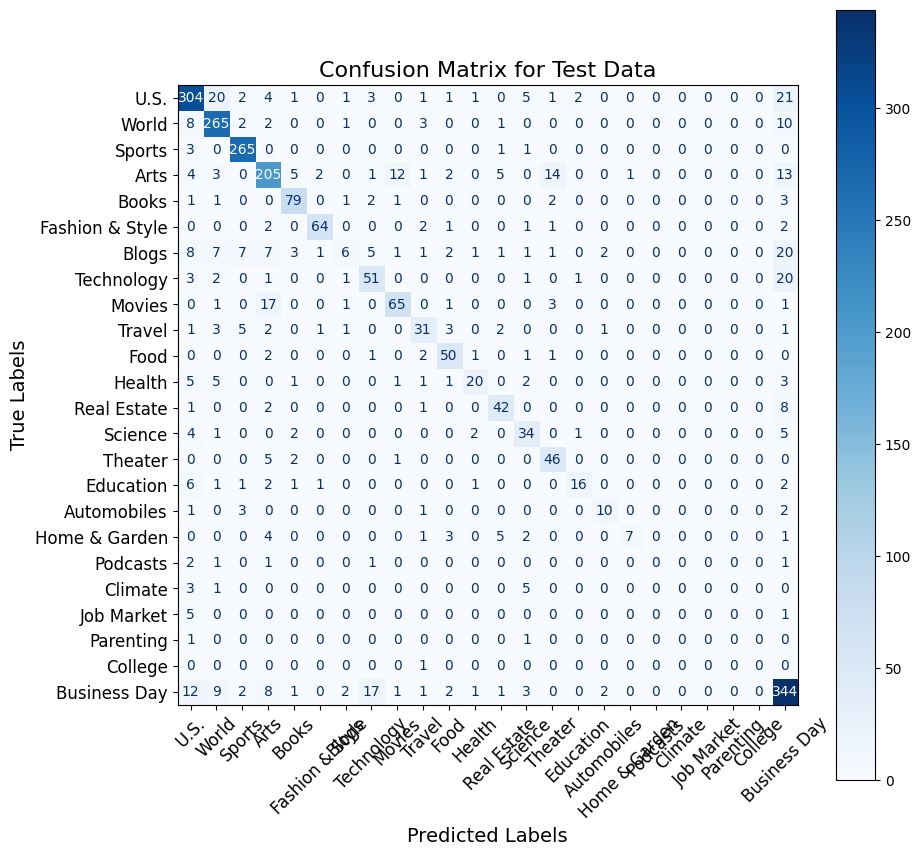

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
labels = list(label2id.keys())  # Ensure labels are in the correct order if needed

# Initialize the display object for the confusion matrix with more aesthetic settings
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix with adjustments
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as necessary
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for Test Data', fontsize=16)  # Set title
ax.set_xlabel('Predicted Labels', fontsize=14)  # Set x-axis label
ax.set_ylabel('True Labels', fontsize=14)  # Set y-axis label
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels if they overlap
plt.xticks(fontsize=12)  # Adjust font size of the x-axis tick labels
plt.yticks(fontsize=12)  # Adjust font size of the y-axis tick labels
plt.show()


## Classification Report

In [152]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(true_labels, predicted_labels, target_names=list(label2id.keys()), output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Optionally, you can round the numbers for better readability
report_df = report_df.round(2)

# Display the DataFrame
print(report_df)


                 precision  recall  f1-score  support
U.S.                  0.82    0.83      0.82   367.00
World                 0.83    0.91      0.87   292.00
Sports                0.92    0.98      0.95   270.00
Arts                  0.78    0.76      0.77   268.00
Books                 0.83    0.88      0.85    90.00
Fashion & Style       0.93    0.88      0.90    73.00
Blogs                 0.43    0.08      0.14    74.00
Technology            0.63    0.64      0.63    80.00
Movies                0.79    0.73      0.76    89.00
Travel                0.66    0.61      0.63    51.00
Food                  0.76    0.86      0.81    58.00
Health                0.74    0.51      0.61    39.00
Real Estate           0.72    0.78      0.75    54.00
Science               0.60    0.69      0.64    49.00
Theater               0.67    0.85      0.75    54.00
Education             0.80    0.52      0.63    31.00
Automobiles           0.67    0.59      0.62    17.00
Home & Garden         0.88  

c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## Error Inspection

In [154]:
# Invert the label2id dictionary to create a map from id to label
id2label = {v: k for k, v in label2id.items()}

# Creating a DataFrame for easier manipulation
predictions_df = pd.DataFrame({
    'text': test_data['combined_text'],
    'true_label': [id2label[label] for label in true_labels],  # Use the inverted dictionary for transformation
    'predicted_label': [id2label[label] for label in predicted_labels]
})

# Filter out correct predictions
error_df = predictions_df[predictions_df['true_label'] != predictions_df['predicted_label']]
print(error_df.sample(10))  # Randomly sample some errors for review

                                                    text    true_label  \
30386  as hussein faded, prisoners were executed sadd...         World   
22645  where dinnertime and showtime mingle this week...          Food   
31301  chip producer to expand dresden plant american...    Technology   
45688  oilmen meet with cubans in mexico, but u.s. in...          U.S.   
11877  a quest to make the morgan seaworthy restorers...       Science   
42321  charlemagne capital posts rise in assets under...         Blogs   
11448  r. kelly’s manager surrenders on threat charge...          Arts   
48373  names of the dead dept of defense confirms dea...          U.S.   
18309  on the instagram presidential campaign trail p...         Blogs   
3632   skeptical of facebook, until the checkbook cam...  Business Day   

      predicted_label  
30386            U.S.  
22645            Arts  
31301    Business Day  
45688    Business Day  
11877    Business Day  
42321    Business Day  
11448          Mo

In [155]:
import pandas as pd

# Set options to display full content
pd.set_option('display.max_colwidth', None)  # or use a large number instead of None for older pandas versions

# Display the first error row fully in the console
if not error_df.empty:
    print(error_df.iloc[0])
else:
    print("No errors to display.")


text               clinton is said to be close to book deal bill clinton said to be close to deal to sell rights to publish memoir for advance that will probably exceed his wife's near-record payment of $8 million for her memoir; former president may decide to accept offer and negotiate contract without au...  bill clinton said to be close to deal to sell rights to publish memoir for advance that will probably exceed his wife's near-record payment of $8 million for her memoir; former president may decide to accept offer and negotiate contract without auction; that would allow him to avoid discussing his plans with publishers and soliciting bids, as his wife, sen hillary rodham clinton, did; publishing executives say any offer would be contingent on nature of book--that it be personal memoir rather than treatise on public policy; it is not clear how much clinton has disclosed about his plans for memoir, including whether he would discuss monica s lewinsky or whitewater investigation (m)

## Top Misclassified Classes

In [156]:
misclassified_counts = error_df['true_label'].value_counts()
print(misclassified_counts)

true_label
Blogs              68
Arts               63
U.S.               63
Business Day       62
Technology         29
World              27
Movies             24
Travel             20
Health             19
Home & Garden      16
Science            15
Education          15
Real Estate        12
Books              11
Climate             9
Fashion & Style     9
Food                8
Theater             8
Automobiles         7
Job Market          6
Podcasts            6
Sports              5
Parenting           2
College             1
Name: count, dtype: int64


## Text Lenght Analysis

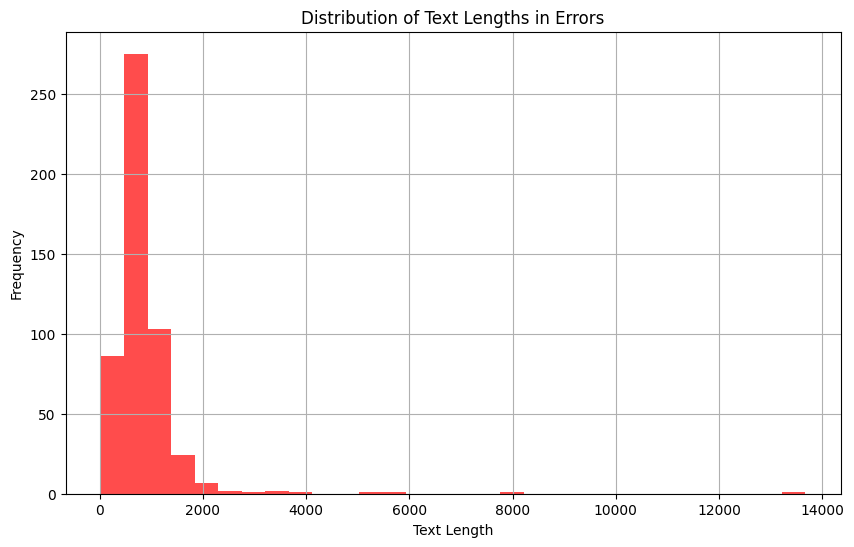

In [158]:
import matplotlib.pyplot as plt

# Adding text length as a column if not already added
if 'text_length' not in error_df.columns:
    error_df['text_length'] = error_df['text'].apply(len)

# Plotting distribution of text lengths in erroneous texts
plt.figure(figsize=(10, 6))
plt.hist(error_df['text_length'], bins=30, alpha=0.7, color='red')
plt.title('Distribution of Text Lengths in Errors')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

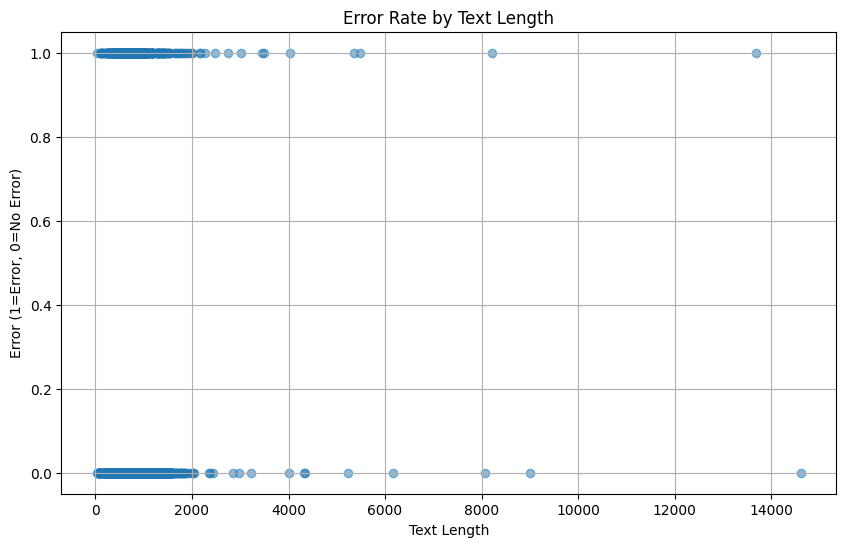

In [159]:
# Assuming predictions_df includes all predictions, not just errors
predictions_df['text_length'] = predictions_df['text'].apply(len)
predictions_df['is_error'] = predictions_df['true_label'] != predictions_df['predicted_label']

# Now plotting error rates by text length
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['text_length'], predictions_df['is_error'], alpha=0.5)
plt.title('Error Rate by Text Length')
plt.xlabel('Text Length')
plt.ylabel('Error (1=Error, 0=No Error)')
plt.grid(True)
plt.show()


## Word and Phrase Analysis

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range=(2,2), n=None):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bi-grams in the erroneous texts
top_bi_grams = get_top_ngrams(error_df['text'], ngram_range=(2, 2), n=20)
print(top_bi_grams)


[('new york', 107), ('united states', 90), ('subject united', 44), ('york city', 33), ('subject theater', 26), ('real estate', 25), ('subject computers', 24), ('computers internet', 24), ('service members', 24), ('politics government', 23), ('global warming', 22), ('high school', 21), ('subject books', 20), ('books literature', 20), ('los angeles', 20), ('york times', 19), ('year old', 18), ('american service', 18), ('members died', 18), ('states politics', 16)]


## Sentiment Analysis

In [164]:
import pandas as pd

# Set display options to better accommodate long texts and increase column width
pd.set_option('display.max_colwidth', 200)  # Adjust this based on your actual data
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from being split across the console

# Sample data for presentation
sampled_data = error_df[['text', 'true_label', 'predicted_label', 'sentiment']].sample(10)
print(sampled_data)

                                                                                                                                                                                                          text     true_label predicted_label  sentiment
46510  letting the view speak for itself viewing platform erected beside site of world trade center, first architectural response to attacks of sept 11, was designed by four of new york's best-known arch...  Home & Garden     Real Estate  -0.005123
19943  rules to strengthen vehicle roofs are weighed congess and national highway traffic safety administration are weighing separate proposals to bolster minimum requirements for strength of roofs of ca...   Business Day            U.S.   0.048310
13136  our cluttered minds a technology writer maintains we’re trading away the seriousness of sustained attention for the web’s frantic superficiality.  a technology writer maintains we’re trading away ...          Books      Technology  -0.087662
2078

In [167]:
import pandas as pd

# Set display options to better accommodate long texts and increase column width
pd.set_option('display.max_colwidth', 200)  # Adjust this based on your actual data
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from being split across the console

# Sample 2 or 3 data instances for presentation
sampled_data = error_df[['text', 'true_label', 'predicted_label', 'sentiment']].sample(3)  # Change the number as needed

# Print each row in the DataFrame separately to control layout better
for index, row in sampled_data.iterrows():
    print(f"Text: {row['text']}\nTrue Label: {row['true_label']}\nPredicted Label: {row['predicted_label']}\nSentiment: {row['sentiment']}\n{'-'*100}\n")


Text: public enemy to use a digital distributor tunecore, a digital music distributor, is expected to announce that public enemy, one of the seminal hip-hop groups, will use its service for its new album.  tunecore, a digital music distributor, is expected to announce that public enemy, one of the seminal hip-hop groups, will use its service for its new album. jeff price, the founder and chief executive of tunecore, a digital music distributor, has a simple pitch for musicians: “for $30, the cost of a pizza and a six-pack, you can get your album on itunes, the third-largest music store in the country.”subject: advertising and marketing, persons: chuck d (1960- ), persons: winehouse, amy, subject: music, persons: marley, ziggy, organizations: public enemy
True Label: Business Day
Predicted Label: Arts
Sentiment: -0.017373737373737375
----------------------------------------------------------------------------------------------------

Text: u.s. pledges to pay family of those killed in b